## Pràctica 6
### Gestió de residus

[<center><img src=./static/Deer_Island_digesters.jpg width=50%></center>](#img_Deer_Island)

In [3]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import matplotlib.pyplot as plt
from IPython.display import Math, display
import sympy as sp
from sympy.physics.units.systems import SI
from sympy.physics.units import meter, second, liter, hour, degree, convert_to
from sympy import sin, cos, pi, Abs

sp.init_printing()

def show(*args):
    out = ""
    for arg in args:
        if isinstance(arg, (sp.Expr, sp.Eq)):
            arg = sp.latex(arg)
        else:
            arg = str(arg)
        out += arg
    display(Math(out))
    
qq = "\quad "

## Gestió de residus
- Tenim una planta de gestió de residus i hem de limitar la concentració d'un reactiu
- El nostre reactor està compost de 2 dipòsits connectats en sèrie amb un cabal continu.
- Volem saber quin ha de ser el cabal d'aigua per no superar a la sortida una concentració de $0.05 \pm 0.01\, mg/l$ amb un CL del 99%
- Al primer dipòsit es carrega el reactiu
- Del primer dipòsit passen al segon i d'ací surten cap a la següent fase.
- El volum dels dipòsits és de $100.0 \pm 0.1 \,m^3$
- Cada càrrega és de $80.0 \pm 0.1 \,g$ de reactiu
- El reactiu té una taxa de descomposició de $0.10 \pm 0.01\, s^{-1}$ reaccions per segon

### Dades
- Per validar el model hem contractat un laboratori d'assaigs que ha fet les següents mesures:
    - Volum d'aigua dels tancs de proves $1.0000 \pm 1\times10^{-4} m^3$
    - Concentració inicial $10.0 \pm 0.1 \,mg/l$
    - Flux d'aigua $60.000 \pm 0.001 \,l/s$

Index(['t (min)', 'Concentració (mg/l)', 'Flux (l/min)'], dtype='object')


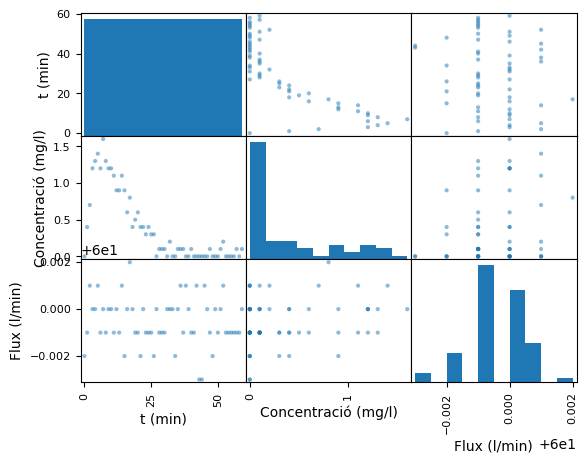

In [4]:
# Dades
data = pd.read_csv("./data/reactiu.csv")
print(data.columns)
l = pd.plotting.scatter_matrix(data[data.columns])

## Apartats
- Descriu i analitza el sistema rellevant per a l'estudi (5 punts)
- Fes les assumpcions pertinents i argumenta-les adequadament (5 punts)
- Modelitza i resol el model (10 punts)
- Verifica i valida el model (10 punts)
- Fes una anàlisi crítica dels resultats (5 punts)

## Anàlisi del sistema

### Context

Per tal de controlar la concentració d'un reactiu a una planta de gestió de residus s'introdueix el reactiu en un tank on s'introdueix un cabal d'aigua.$\newline$
A mida que el cabal surt del tank, s'introdueix a un segon tank per a continuar amb la seva gestió.
Finalment el reactiu decau en un altre compost que és extren amb un cabal.$\newline$
Volem que la quantitat de reactiu (que no ha decaigut en el proces) sigui com a molt un llindar establert.

### Paràmetres

El paràmetres necesaris per a modelitzar la quantitat de reactiu que no és decompost és:$\newline$
-> Volum dels tanks: $V_1, V_2$$\newline$
-> Quantitat de reactiu introduït: $m_r$$\newline$
-> Concentració inicial del reactiu: $c_r$$\newline$
-> Cabal d'aigua: $Q_i, Q_{12}, Q_o$ (cabal d'entrada, cabal entre diposit 1 i 2, i cabal de sortida respectivament)$\newline$
-> Concentració final de reactiu: $c_f$$\newline$
-> Taxa de descomposició del reactiu: $\lambda$$\newline$

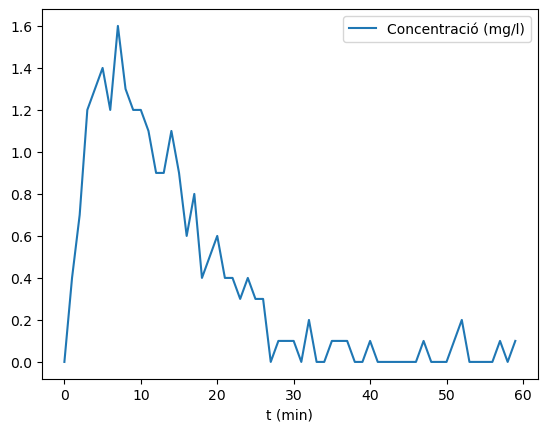

In [6]:
# Visualització de dades
l = data.plot(y="Concentració (mg/l)", x="t (min)")

## Assumpcions

Per tal de simplificar i fer una primera aproximació del problema s'han tingut en compte les següents assumpcions a l'hora de fer el model:$\newline$
-> Els volums dels tanks 1 i 2 son iguals.$\newline$
-> Els cabals d'entrada, sortida i entre els diposits son iguals.$\newline$
-> Els diposits son completament plens d'aigua.$\newline$
-> El reactiu és disol completament i de forma instantania una vegada introduït al tank.$\newline$
-> El temps de transportar el líquid entre els tanks és negligible.$\newline$

## Modelització

In [64]:
# Declaració funcións
from sympy.abc import l

Q = sp.symbols("Q")

m1 = sp.Function("m_1")(t)
m2 = sp.Function("m_2")(t)

dm1 = -(Q+l)*m1
dm2 = Q*(m1 - m2) -m2*l

show(dm1,qq, dm2)

<IPython.core.display.Math object>

In [103]:
# Resolució sistema EDOS
m1p = sp.diff(m1, t)
eq1 = sp.Eq(dm1,m1p)

m2p = sp.diff(m2, t)
eq2 = sp.Eq(dm2,m2p)

M1, M2 = sp.dsolve([eq1, eq2], [m1,m2])

show(M1,qq,M2)

<IPython.core.display.Math object>

Per tant, el nostre model de la concentració final del procés de gestió del reactiu és: $C = \frac{m_2}{V}$

In [104]:
# Càlcul de les constants:
V = 1000
c_i = 10
# A t = 0, m1 = c_r * V
C1 = c_i * V

# A t = 0, m2 = 0
C2 = 0

In [108]:
C_1 = sp.Symbols()

f = Q*sp.exp(-t(Q+l))*(C_1*t+C_2)
V = 1000
valors = {"l": 0.1, "Q": 60, "C_1": C1, "C_2": C2}


ft = sp.lambdify(t, f.subs(valors))

temps = np.linspace(0, 60, 50)
y = ft(temps)/V

plt.plot(temps, y)

TypeError: 'Symbol' object is not callable

### Coeficients de sensitivitat del model

In [8]:
# CX = X / F * sp.diff(F, X)

## Verificació i validació

### Verificació

### Validació

In [9]:
# Dades

In [10]:
# Simulació

In [11]:
# Discrepància
# E = S - D
# E

In [12]:
# Derivades parcials
# mesures = {}
# SX = sp.diff(E, X).subs(valors).subs(mesures).n()

In [13]:
# Incertesa dels paràmetres al quadrat
# up2 = np.sum(np.power([
#     SX * EX,
# ], 2))
# up2

In [14]:
# Incertesa de l'estimació de la discrepància
# uV = np.sqrt(up2)

# Discrepància
# show("E = %0.3f \pm %0.3f" % (E, uV))

In [15]:
# Nivell de confiança per un error del 5% amb nu graus de llibertat
# t = 0.05 / ur
# l, h = stats.t.cdf([-t, t], nu)
# CL = h - l

In [16]:
# Interval de t per un cert nivell de confiança amb nu graus de llibertat
# stats.t.interval(CL, nu) 

## Anàlisi crítica

In [17]:
# Resultat


# Referències

- <a id='bib_Edwards'></a> Edwards, D., **2001**. *Guide to mathematical modelling*. Palgrave, Basingstoke.
- <a id='img_Deer_Island'></a> https://commons.wikimedia.org/wiki/File:Deer_Island_P1110304.jpg

Copyright (C) 2022 Gabriel Jover Mañas

    Permission is granted to copy, distribute and/or modify this document
    under the terms of the GNU Free Documentation License, Version 1.3
    or any later version published by the Free Software Foundation;
    with no Invariant Sections, no Front-Cover Texts, and no Back-Cover Texts.
    A copy of the license is included in the section entitled "GNU
    Free Documentation License".

![GFDL][GFDL]

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <https://www.gnu.org/licenses/>.

![GPL3][GPL3]

[GFDL]: static/gfdl-logo-small.png
[GPL3]: static/gplv3-127x51.png